With this tutorial, I present how to build a digit recognizer using Convolution Neural Network.

Link: https://www.kaggle.com/c/digit-recognizer

MNIST ("Modified National Institute of Standards and Technology") is a well known pretty standard dataset. It has thousands of images of handwritten digits.

Dataset is loaded below. It has images and label for each image. The whole of dataset is divided into training and testing data.

In [11]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


Above, we obeserve that in total of 70K images, 60K are used for training and 10K will be used for training.
Also, each image has dimension 28 x 28 (represented by the X_train and X_test). Y_train and Y_test are vectors of size 60K and 10K i.e. each image has a corresponding value here.

Lets see how the data looks like

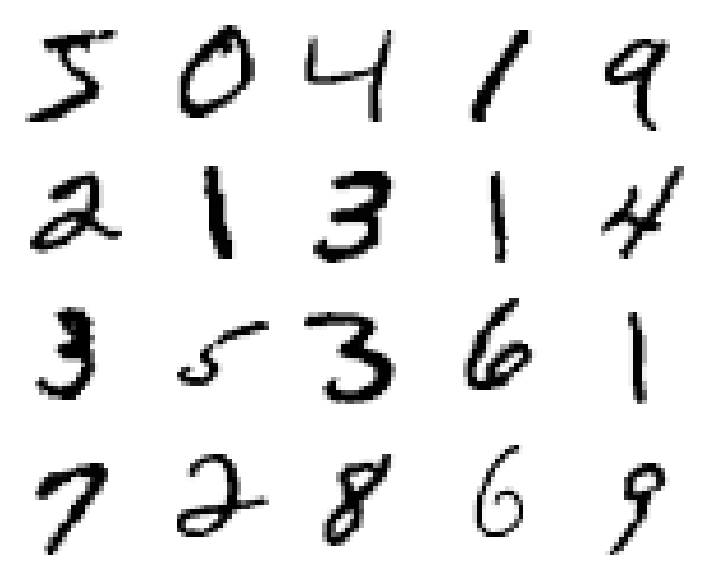

In [12]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

def overview(start, end, X):
    fig = plt.figure(figsize=(10,10))
    for i in range(start, end):
        input_img = X[i:(i+1),:,:]
        ax = fig.add_subplot(5,5,i+1)
        ax.imshow(input_img[0,:,:])
        plt.xticks(np.array([]))
        plt.yticks(np.array([]))
        plt.tight_layout()
    plt.show()
overview(0,20, X_train)

Before we feed these images to the network, we do some transformations on the input data.

First we make the imge shape as 28 x 28 x 1 i.e. adding a depth of 1 as the input image as seen above has only grayscale channel. Also, the input data is normalized in range of 0 to 1 and made of type float.


In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train/=255
X_test/=255

In [14]:
print('Training: ',X_train.shape)
print('Test: ',X_test.shape)

Training:  (60000, 28, 28, 1)
Test:  (10000, 28, 28, 1)


Now for the class labels, we have a number representing it. Binary class matrix is created for the labels

In [0]:
from keras.utils import np_utils

num_classes = 10

Y_train = np_utils.to_categorical(y_train, num_classes)
Y_test = np_utils.to_categorical(y_test, num_classes)

In [16]:
print('Training: ',Y_train.shape)
print('Test: ',Y_test.shape)

Training:  (60000, 10)
Test:  (10000, 10)


Below is the network architecture for CNN.

In [0]:
from keras.models import Sequential
from keras.layers import Convolution2D, Activation, BatchNormalization, MaxPooling2D, Dropout, Dense, Flatten, AveragePooling2D

model = Sequential()

model.add(Convolution2D(32, (3, 3), padding='same', input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
model.add(Dropout(0.25))

model.add(Convolution2D(64, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
model.add(Dropout(0.25))

model.add(Convolution2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
model.add(Dropout(0.25))

model.add(Convolution2D(256, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(64))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(10))
model.add(Activation('softmax'))

We can see the summary of the model:

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_7 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
activation_8 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
batch_normalization_8 (Batch (None, 14, 14, 64)        256       
__________

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Now, finally the model can be run. Here epochs and batch size is configurable.

In [20]:
epochs = 10
batch_size = 32

model.fit(X_train, Y_train, 
          batch_size=batch_size, epochs=epochs, shuffle=True, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 53s 877us/step - loss: 0.3286 - acc: 0.9017
Epoch 2/10
 3552/60000 [>.............................] - ETA: 47s - loss: 0.1325 - acc: 0.9578

60000/60000 [==============================] - 51s 856us/step - loss: 0.1063 - acc: 0.9690
Epoch 3/10
 8864/60000 [===>..........................] - ETA: 43s - loss: 0.0901 - acc: 0.9745

60000/60000 [==============================] - 52s 859us/step - loss: 0.0862 - acc: 0.9751
Epoch 4/10
11296/60000 [====>.........................] - ETA: 41s - loss: 0.0678 - acc: 0.9803

60000/60000 [==============================] - 52s 859us/step - loss: 0.0708 - acc: 0.9798
Epoch 5/10
12384/60000 [=====>........................] - ETA: 40s - loss: 0.0705 - acc: 0.9799

60000/60000 [==============================] - 52s 860us/step - loss: 0.0649 - acc: 0.9810
Epoch 6/10
12832/60000 [=====>........................] - ETA: 40s - loss: 0.0595 - acc: 0.9818

60000/60000 [==============================] - 51s 855us/step - loss: 0.0561 - acc: 0.9839
Epoch 7/10
13024/60000 [=====>........................] - ETA: 40s - loss: 0.0419 - acc: 0.9874

60000/60000 [==============================] - 51s 857us/step - loss: 0.0525 - acc: 0.9847
Epoch 8/10
13184/60000 [=====>........................] - ETA: 40s - loss: 0.0516 - acc: 0.9866

60000/60000 [==============================] - 51s 856us/step - loss: 0.0483 - acc: 0.9866
Epoch 9/10
13184/60000 [=====>........................] - ETA: 40s - loss: 0.0392 - acc: 0.9880

60000/60000 [==============================] - 51s 853us/step - loss: 0.0441 - acc: 0.9866
Epoch 10/10
13184/60000 [=====>........................] - ETA: 40s - loss: 0.0366 - acc: 0.9888

60000/60000 [==============================] - 51s 857us/step - loss: 0.0399 - acc: 0.9881


Once, the network is trained, lets see how it performs with test dataset.

In [21]:
score = model.evaluate(X_test, Y_test)
print('Evaluation loss: ', score[0])
print('Evaluation accuracy: ', score[1])

10000/10000 [==============================] - 2s 247us/step
Evaluation loss:  0.01788654870198079
Evaluation accuracy:  0.9942
